In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

In [15]:
def sigma_eff(nt, nd,  ndacc,sigma_ndacc):    
    epsilon=nt/(nd-ndacc)
    sigma_nt=np.sqrt(nd*epsilon*(1-epsilon))

    term_1=sigma_nt/(nd-ndacc)
    term_2=nt*sigma_ndacc/(nd-ndacc)**2
    sigma_eff=np.sqrt(term_1**2+term_2**2)
    return sigma_eff

## Geometria

In [33]:
larghezza_pla=26.7 #cm
lunghezza_pla=52.5
prodondità_pla=2.3
area_pla=larghezza_pla*lunghezza_pla
print(f"Area sovrapposizone plastici {area_pla:.2f} cm^2.")

Area sovrapposizone plastici 1401.75 cm^2.


In [34]:
flusso=1/60 #al cm^2
conteggi=area_pla/60
print(f"Conteggi attesi {conteggi:.2f} al secondo su ogni singolo scintillatore.")

Conteggi attesi 23.36 al secondo su ogni singolo scintillatore.


In [35]:
larghezza_bers=30 #cm 
lunghezza_bers=31 #cm per entrambi gli oggetti
profondità_bers=30 #cm per entrambi gli oggetti
area_bers=larghezza_bers*lunghezza_bers
print(f"Area sovrapposizone bersaglio {area_bers:.2f} cm^2.")

larghezza_b1=larghezza_bers/2
lunghezza_b1=lunghezza_bers/2
profondità_b1=profondità_bers/2
area_b1=larghezza_b1*lunghezza_b1
print(f"Area singoli cosi del bersaglio {area_b1:.2f} cm^2.")

Area sovrapposizone bersaglio 930.00 cm^2.
Area singoli cosi del bersaglio 232.50 cm^2.


## Angolo solido sotteso e rate atteso dello start

Quando guardo al segnale di START io sto guardando la coincidenza tra gli scintillatori sopra e l'OR del bersaglio. Considera quindi l'angolo solido sotteso dal PMT7 rispetto al bersaglio complessivo

In [36]:
distanza_7_4=28.9 #cm
distanza_4_2=39.4
distanza_2_b=7
distanza_b_1=15

In [37]:
# Function to calculate the solid angle
def solid_angle(width, length, distance):
    """Calculate the solid angle of a rectangular target."""
    half_width = width / 2
    half_length = length / 2
    r = distance
    return 4 * math.atan((half_width * half_length) / (r * math.sqrt(r**2 + half_width**2 + half_length**2)))

# Calculate solid angles
solid_angle_7 = solid_angle(larghezza_bers, lunghezza_bers, distanza_7_4 + distanza_4_2 + distanza_2_b)
print(f"Solid angle from PMT7 to target: {solid_angle_7:.4f} sr")

Solid angle from PMT7 to target: 0.1576 sr


Mentre l'angolo massimo sotteso è determinato dallo scintillatore più in alto

In [38]:
theta_max_lun=np.arctan(lunghezza_pla/(2*(distanza_7_4 + distanza_4_2 + distanza_2_b)))
theta_max_lar=np.arctan(larghezza_pla/(2*(distanza_7_4 + distanza_4_2 + distanza_2_b)))
theta_max=np.mean([theta_max_lun,theta_max_lar])
print(f"Massimo angolo sotteso: {theta_max:.1f} rad")

Massimo angolo sotteso: 0.3 rad


Se voglio calcolare il rate della coincidenza 7, 4, 2, bersaglio....

Se ogni muone perde circa 2.5MeV/g cm^2 , quando attraversa il bersaglio mi aspetto che perda intorno a 75 MeV. (Utilizza quest'informazione per la calibrazione in energia del CAEN multicanale) Non mi aspetto che le MIP (molto energetiche ) si fermino nel mio bersaglio e che solo una frazione molto piccola dei muoni finisca là.

il PMT1 non lo vede, per inefficienza, per motivi geometrici o perché si è fermato prima? Questo determina il fondo della misura, ma va valutato con il MonteCarlo. 

Qual è la differenza tra gli accidentali di tutte le coincidenze?

## Curve di efficienza bersaglio

Ricorda che qui stai trascurando le triple accidentali

In [39]:
time=10 #s
len_segnale=25e-9
#tensione PMT1. 1720
#tensione PMT2. 1800

V_8= np.array([952, 1001, 1022, 1046, 1053, 1104, 1152, 1202])
V_9= np.array([952, 1004, 1051, 1102, 1152, 1203, 1232, 1251, 1266])
V_10=np.array([957, 1001, 1020, 1034, 1045, 1052, 1102, 1154, 1204])
V_11=np.array([826, 870, 927, 952, 984, 1007, 1020, 1036, 1056, 1080, 1101, 1128])
print(len(V_11))

triple_8=np.array([3, 15, 13, 12, 14, 13, 12, 12])
triple_9=np.array([0, 6, 13, 20, 12, 17, 22, 19, 16])
triple_10=np.array([4, 4, 5, 5, 10, 10, 12, 14, 9])
triple_11=np.array([0, 0, 10, 9, 12, 18, 21, 17, 17, 14, 22, 15])

doppie_1_2= np.array([43, 46, 46, 41, 48, 47, 54, 43, 41])
doppie_1_2_8= np.array([43, 46, 46, 48, 47, 54, 43, 41])
doppie_1_2_9= np.array([43, 46, 47, 54, 43, 41, 46, 41, 48])
doppie_1_2_11= np.array([43, 46, 47, 47, 44, 46, 47, 37, 46, 37, 59, 46])

counts_8= np.array([93, 128, 112, 170, 202, 349, 849, 1352])
counts_9 =np.array([72, 102, 104, 104, 162, 327, 425, 538, 666])
counts_10=np.array([114, 140, 157, 251, 243, 313, 657, 1305, 1909])
counts_11=np.array([76, 79, 85, 103, 105, 149, 131, 212, 249, 377, 657, 971])



12


In [40]:
rate8=counts_8/time
rate9=counts_9/time
rate10=counts_10/time
rate11=counts_11/time

errorrate8=np.sqrt(counts_8)/time
errorrate9=np.sqrt(counts_9)/time
errorrate10=np.sqrt(counts_10)/time
errorrate11=np.sqrt(counts_11)/time

In [41]:
def sigma_eff(nt, nd,  ndacc,sigma_ndacc):    
    epsilon=nt/(nd-ndacc)
    sigma_nt=np.sqrt(nd*epsilon*(1-epsilon))

    term_1=sigma_nt/(nd-ndacc)
    term_2=nt*sigma_ndacc/(nd-ndacc)**2
    sigma_eff=np.sqrt(term_1**2+term_2**2)
    return sigma_eff

In [42]:
counts_acc= 1073*558*(2*len_segnale-2*2e-9)/time #coincidenza minima di 2ns
sigma_counts_acc=np.sqrt((np.sqrt(1073)*558)**2+(1073*np.sqrt(558))**2)*(2*len_segnale-2*2e-9)/time

eff_8=triple_8/(doppie_1_2_8-counts_acc)
error_eff8=sigma_eff(triple_8, doppie_1_2_8, counts_acc, sigma_counts_acc)
print(f"Eff 8 {eff_8} errore: {error_eff8}")
eff_9=triple_9/(doppie_1_2_9-counts_acc)
error_eff9=sigma_eff(triple_9, doppie_1_2_9, counts_acc, sigma_counts_acc)
print(f"Eff 9 {eff_9} errore: {error_eff9}")
eff_10=triple_10/(doppie_1_2-counts_acc)
error_eff10=sigma_eff(triple_10, doppie_1_2, counts_acc, sigma_counts_acc)
print(f"Eff 10 {eff_10} errore: {error_eff10}")
eff_11=triple_11/(doppie_1_2_11-counts_acc)
error_eff11=sigma_eff(triple_11, doppie_1_2_11, counts_acc, sigma_counts_acc)
print(f"Eff 11 {eff_11} errore: {error_eff11}")


Eff 8 [0.06977191 0.32610648 0.28262562 0.25001435 0.2978898  0.24075302
 0.27908764 0.29270259] errore: [0.03885336 0.06912298 0.06639353 0.06250478 0.06671246 0.05818388
 0.06840772 0.07106431]
Eff 9 [0.         0.13044259 0.27661195 0.37038926 0.27908764 0.414662
 0.47828951 0.46344577 0.33335246] errore: [0.         0.04965991 0.06525258 0.06571894 0.06840772 0.0769463
 0.07365586 0.07788315 0.06804626]
Eff 10 [0.09302921 0.08696173 0.10870216 0.12195941 0.20834529 0.21277843
 0.22223356 0.32560225 0.21952694] errore: [0.04429961 0.04154853 0.04589629 0.05110957 0.05862246 0.05970199
 0.05657892 0.07146532 0.06464875]
Eff 11 [0.         0.         0.21277843 0.19150058 0.27274435 0.39132778
 0.44683469 0.45949366 0.36958735 0.37840655 0.37289876 0.32610648] errore: [0.         0.         0.05970199 0.05739862 0.06714633 0.07196298
 0.07252328 0.08193541 0.07117346 0.07973775 0.06295911 0.06912298]


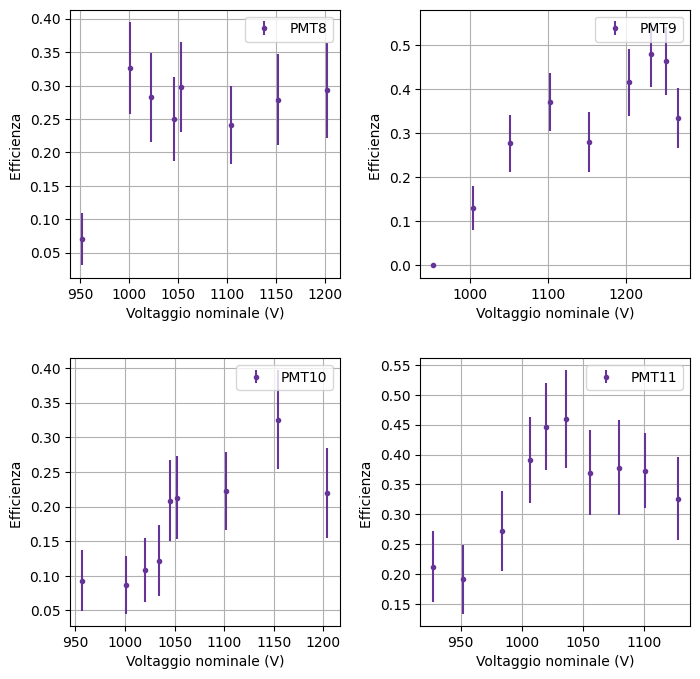

In [43]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
#plt.title('Efficienza fotomoltiplicatori degli scintillatori plastici di bersaglio')

plt.subplot(2,2,1)
plt.errorbar(V_8,eff_8,error_eff8, fmt='.', color='rebeccapurple',label='PMT8')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,2,2)
plt.errorbar(V_9,eff_9,error_eff9, fmt='.', color='rebeccapurple', label='PMT9')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,2,3)
plt.errorbar(V_10,eff_10,error_eff10, fmt='.', color='rebeccapurple', label='PMT10')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,2,4)
plt.errorbar(V_11[2:],eff_11[2:],error_eff11[2:], fmt='.', color='rebeccapurple', label='PMT11')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

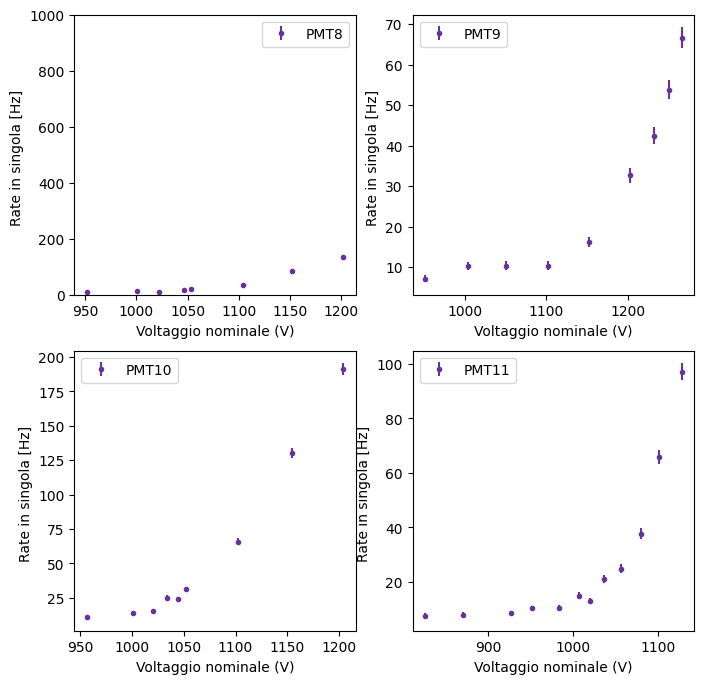

In [44]:
plt.figure(figsize=(8,8))
plt.tight_layout
#plt.title("Rate in singola degli scintillatori")
plt.subplot(221)
plt.errorbar(V_8,rate8,errorrate8, fmt='.', color='rebeccapurple',label='PMT8')
plt.ylabel('Rate in singola [Hz] ')
plt.xlabel('Voltaggio nominale (V)')
plt.ylim(0,1000)
plt.legend()

plt.subplot(222)
plt.errorbar(V_9,rate9,errorrate9, fmt='.', color='rebeccapurple',label='PMT9')
plt.ylabel('Rate in singola [Hz] ')
plt.xlabel('Voltaggio nominale (V)')
plt.legend()

plt.subplot(223)
plt.errorbar(V_10,rate10,errorrate10, fmt='.', color='rebeccapurple',label='PMT10')
plt.ylabel('Rate in singola [Hz] ')
plt.xlabel('Voltaggio nominale (V)')
plt.legend()

plt.subplot(224)
plt.errorbar(V_11,rate11,errorrate11, fmt='.', color='rebeccapurple',label='PMT11')
plt.ylabel('Rate in singola [Hz] ')
plt.xlabel('Voltaggio nominale (V)')
plt.legend()

## Curve efficienza scintillatori plastici

in questo caso mettiamo che l'errore sul voltaggio sia di circa 1 V perché è scelto da GeCo ed oscilla un po'

In [45]:
time=10 #s
len_segnale=25e-9
#PMT3 voltaggio: 1770 V (vedi poi in singola) 
#PMT4 voltaggio: 1700 V

In [46]:
V= np.array([1600, 1650, 1700, 1750, 1800])

triple_1= np.array([9, 13, 12, 20, 33])
triple_2 =np.array([4, 16, 22, 41, 62])
#triple_5=np.array([69, 114, 73, 52, 30])
triple_5=np.array([83, 102, 64, 33, 21])
triple_7 =np.array([1, 14, 34, 48, 66])
doppie_3_4= np.array([152, 183, 154, 153, 193])

counts_1= np.array([183, 475, 915, 2084, 39783])
counts_2= np.array([22, 87, 155, 313, 558])
counts_5=np.array([371, 737, 1276, 2335, 7804])
counts_7=np.array([16, 68, 223, 917, 2063])

In [47]:
#PMT5 voltaggio: 1750 V 
#PMT7 voltaggio: 1750 V
triple_3=np.array([0, 8, 23, 45, 48])
triple_4=np.array([21, 71, 89, 83, 81])
doppie_5_7=np.array([111, 131, 122, 118, 117])
counts_3=np.array([114, 71, 188, 530, 1074])
counts_4=np.array([102, 544, 1390, 13347, 846045])

In [48]:
rate1=counts_1/time
rate2=counts_2/time
rate3=counts_3/time
rate4=counts_4/time
rate5=counts_5/time
rate7=counts_7/time

errorrate1=np.sqrt(counts_1)/time
errorrate2=np.sqrt(counts_2)/time
errorrate3=np.sqrt(counts_3)/time
errorrate4=np.sqrt(counts_4)/time
errorrate5=np.sqrt(counts_5)/time
errorrate7=np.sqrt(counts_7)/time

error3_4=np.sqrt(doppie_3_4)
error5_7=np.sqrt(doppie_5_7)

error1=np.sqrt(triple_1)
error2=np.sqrt(triple_2)
error3=np.sqrt(triple_3)
error4=np.sqrt(triple_4)
error5=np.sqrt(triple_5)
error7=np.sqrt(triple_7)

In [49]:
counts_acc= 743*1973*(2*len_segnale-2*2e-9)/10 #coincidenza minima di 2ns
sigma_counts_acc=np.sqrt((np.sqrt(743)*1973)**2+(743*np.sqrt(1973))**2)*(2*len_segnale-2*2e-9)/10
print("Rate accidentali 34:", counts_acc/10)

counts_acc1= 2335*917*(2*len_segnale-2*2e-9)/10 #coincidenza minima di 2ns
sigma_counts_acc1=np.sqrt((np.sqrt(2335)*917)**2+(2335*np.sqrt(917))**2)*(2*len_segnale-2*2e-9)/10

eff_1=triple_1/(doppie_3_4-counts_acc)
error_eff1=sigma_eff(triple_1, doppie_3_4, counts_acc, sigma_counts_acc)
print(f"Eff 1 {eff_1} errore: {error_eff1}")
eff_2=triple_2/(doppie_3_4-counts_acc)
error_eff2=sigma_eff(triple_2, doppie_3_4, counts_acc, sigma_counts_acc)
print(f"Eff 2 {eff_2} errore: {error_eff2}")

eff_3=triple_3/(doppie_5_7-counts_acc)
error_eff3=sigma_eff(triple_3, doppie_5_7, counts_acc1, sigma_counts_acc1)
print(f"Eff 3 {eff_3} errore: {error_eff3}")
eff_4=triple_4/(doppie_5_7-counts_acc)
error_eff4=sigma_eff(triple_4, doppie_5_7, counts_acc1, sigma_counts_acc1)
print(f"Eff 4 {eff_4} errore: {error_eff4}")

eff_5=triple_5/(doppie_3_4-counts_acc)
error_eff5=sigma_eff(triple_5, doppie_3_4, counts_acc, sigma_counts_acc)
eff_7=triple_7/(doppie_3_4-counts_acc)
error_eff7=sigma_eff(triple_7, doppie_3_4, counts_acc, sigma_counts_acc)
print(f"Eff 7 {eff_7} errore: {error_eff7}")

Rate accidentali 34: 0.0006743319399999998
Eff 1 [0.05921315 0.07104087 0.07792549 0.13072472 0.17099043] errore: [0.01914486 0.01899078 0.02160138 0.02725404 0.02710205]
Eff 2 [0.02631696 0.08743492 0.1428634  0.26798567 0.32125475] errore: [0.01298447 0.02088165 0.02819968 0.03580874 0.03361357]
Eff 3 [0.         0.06107185 0.18853501 0.38137773 0.41028006] errore: [0.         0.0209237  0.03541525 0.04471857 0.04547875]
Eff 4 [0.18920068 0.54201263 0.72954852 0.70343003 0.6923476 ] errore: [0.03717917 0.04353389 0.04021773 0.04204956 0.04267059]
Eff 7 [0.00657924 0.07650555 0.22078889 0.31373932 0.34198086] errore: [0.00655771 0.01964962 0.03342526 0.03751478 0.03414732]


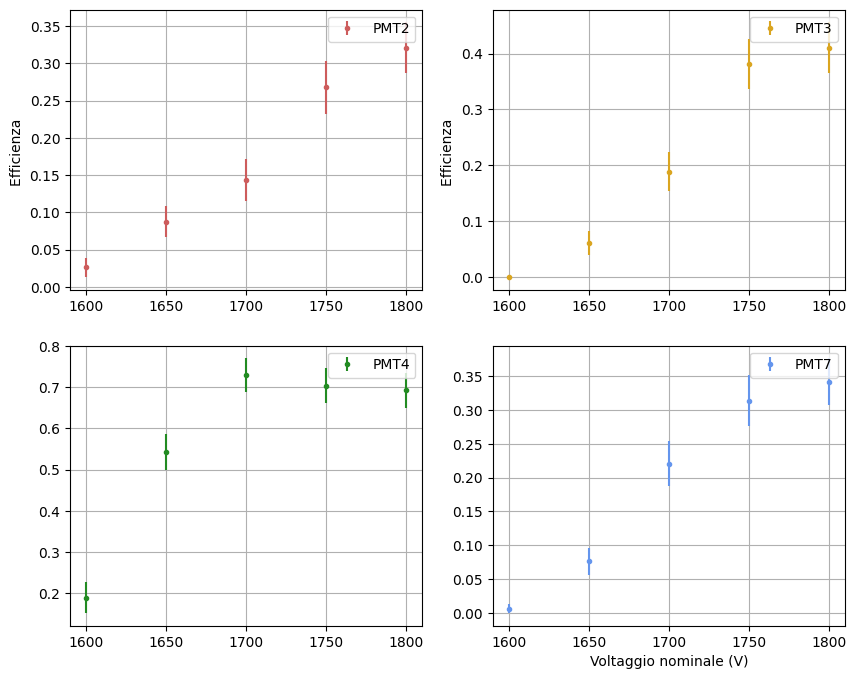

In [50]:
plt.figure(figsize=(10,8))
plt.tight_layout
#plt.title('Efficienza fotomoltiplicatori degli scintillatori plastici')

plt.subplot(2,2,1)
plt.errorbar(V,eff_2,error_eff2, fmt='.', color='indianred', label='PMT2')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,2,2)
plt.errorbar(V,eff_3,error_eff3, fmt='.', color='goldenrod', label='PMT3')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,2,3)
plt.errorbar(V,eff_4,error_eff4, fmt='.', color='forestgreen', label='PMT4')
plt.grid(True)
plt.legend()

plt.subplot(2,2,4)
plt.errorbar(V,eff_7,error_eff7, fmt='.', color='cornflowerblue',label='PMT7')
plt.xlabel('Voltaggio nominale (V)')
plt.grid(True)
plt.legend()
plt.show()

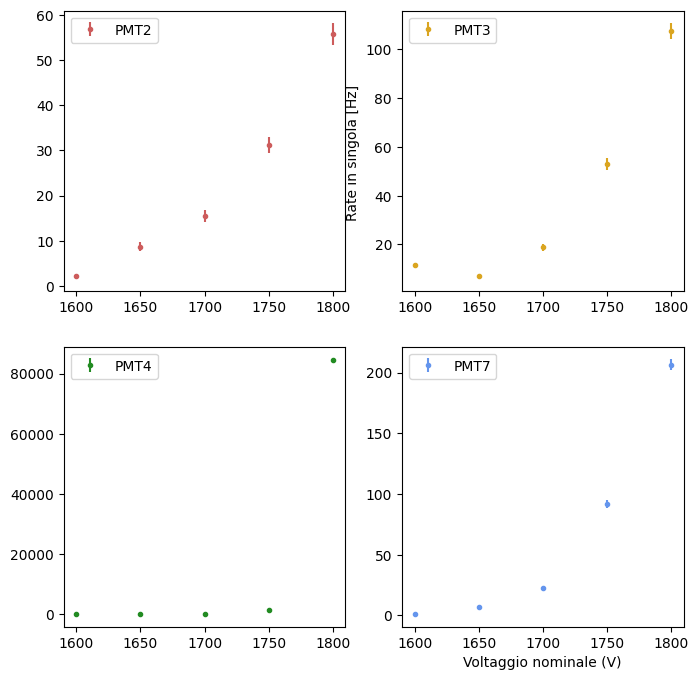

In [51]:
plt.figure(figsize=(8,8))
plt.tight_layout
#plt.title("Rate in singola degli scintillatori")

plt.subplot(221)
plt.errorbar(V,rate2,errorrate2, fmt='.', color='indianred',label='PMT2')
plt.legend()

plt.subplot(222)
plt.errorbar(V,rate3,errorrate3, fmt='.', color='goldenrod',label='PMT3')
plt.ylabel('Rate in singola [Hz] ')
plt.legend()

plt.subplot(223)
plt.errorbar(V,rate4,errorrate4, fmt='.', color='forestgreen',label='PMT4')
plt.legend()

plt.subplot(224)
plt.errorbar(V,rate7,errorrate7, fmt='.', color='cornflowerblue',label='PMT7')
plt.xlabel('Voltaggio nominale (V)')
plt.legend()

## Scintillatore strano

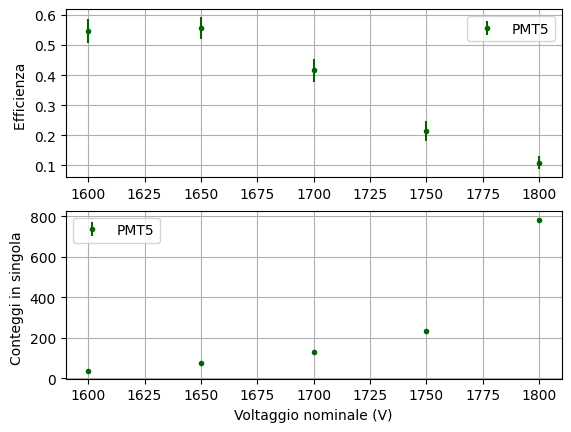

In [52]:
#qui inserire i grafici del PMT5

plt.subplot(2,1,1)
plt.errorbar(V,eff_5,error_eff5, fmt='.', color='darkgreen', label='PMT5')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
plt.errorbar(V,rate5,errorrate5, fmt='.', color='darkgreen',label='PMT5')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Conteggi in singola ')
plt.grid(True)
plt.legend()
plt.show()

## PMT 1 Veto dello start

In [53]:
time=20 #s
len_segnale=25e-9
#PMT2 voltaggio: 1750 V (vedi poi in singola) 
#PMT7 voltaggio: 1750 V

V= np.array([1580, 1550, 1590,1600, 1650, 1700, 1730, 1750, 1780, 1800])
triple_1= np.array([1, 0, 4, 7, 5, 5, 5, 5,10, 8])
doppie_2_7= np.array([1509, 1391, 1536, 1546, 1515, 1451, 1530, 1474, 1478, 1410])
counts_1= np.array([151, 79, 198, 219, 607, 1370, 2097, 2814, 4448, 10543])

In [54]:
rate1=counts_1/time
errorrate1=np.sqrt(counts_1)/time

counts_acc= 420*1112*(2*len_segnale-2*2e-9)/10 #coincidenza minima di 2ns
sigma_counts_acc=np.sqrt((np.sqrt(420)*1112)**2+(420*np.sqrt(1112))**2)*(2*len_segnale-2*2e-9)/20
print("Rate accidentali 27:", counts_acc/20)

eff_1=triple_1/(doppie_2_7-counts_acc)
error_eff1=sigma_eff(triple_1, doppie_2_7, counts_acc, sigma_counts_acc)
print(f"Eff 1 {eff_1} errore: {error_eff1}")

Rate accidentali 27: 0.00010741919999999998
Eff 1 [0.00066269 0.         0.00260417 0.00452782 0.00330033 0.0034459
 0.00326798 0.00339214 0.00676591 0.00567377] errore: [0.00066247 0.         0.00130039 0.00170748 0.00147352 0.0015384
 0.0014591  0.00151443 0.00213232 0.00200028]


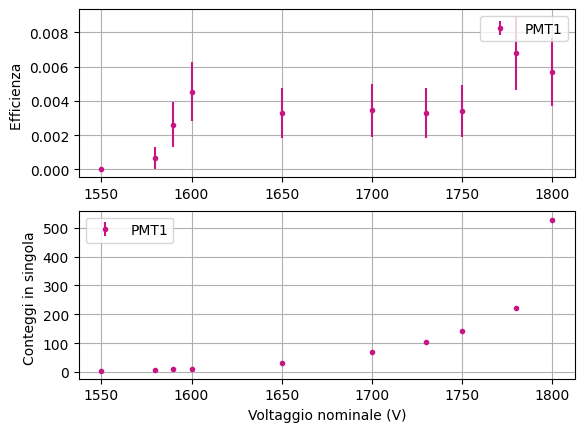

In [55]:
plt.subplot(2,1,1)
plt.errorbar(V,eff_1,error_eff1, fmt='.', color='mediumvioletred', label='PMT1')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
plt.errorbar(V,rate1,errorrate1, fmt='.', color='mediumvioletred',label='PMT1')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Conteggi in singola ')
plt.grid(True)
plt.legend()
plt.show()

In [56]:
time=10 #s
len_segnale=25e-9
#PMT2 voltaggio: 1750 V (vedi poi in singola) 
#PMT7 voltaggio: 1750 V

V= np.array([1600, 1650, 1700, 1750, 1800])
triple_1= np.array([9, 13, 12, 20, 33])
doppie_2_7= np.array([152, 183, 154, 153, 193 ])
counts_1= np.array([183, 475, 915, 2084, 39783])

In [57]:
rate1=counts_1/time
errorrate1=np.sqrt(counts_1)/time

counts_acc= 420*1112*(2*len_segnale-2*2e-9)/10 #coincidenza minima di 2ns
sigma_counts_acc=np.sqrt((np.sqrt(420)*1112)**2+(420*np.sqrt(1112))**2)*(2*len_segnale-2*2e-9)/10
print("Rate accidentali 27:", counts_acc/10)

eff_1=triple_1/(doppie_2_7-counts_acc)
error_eff1=sigma_eff(triple_1, doppie_2_7, counts_acc, sigma_counts_acc)
print(f"Eff 1 {eff_1} errore: {error_eff1}")

Rate accidentali 27: 0.00021483839999999997
Eff 1 [0.05921136 0.07103909 0.07792316 0.13072079 0.17098636] errore: [0.01914401 0.01899009 0.02160044 0.02725288 0.02710115]


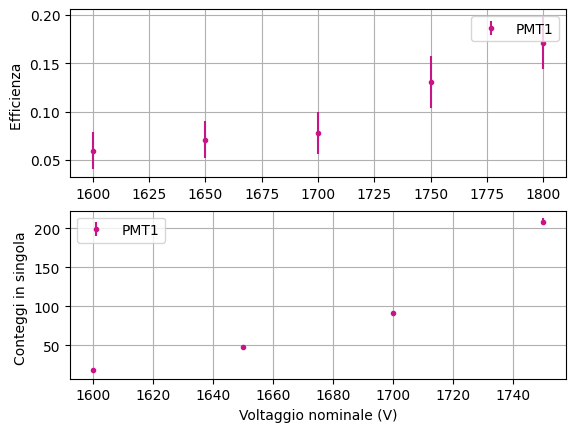

In [58]:
plt.subplot(2,1,1)
plt.errorbar(V,eff_1,error_eff1, fmt='.', color='mediumvioletred', label='PMT1')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
plt.errorbar(V[:-1],rate1[:-1],errorrate1[:-1], fmt='.', color='mediumvioletred',label='PMT1')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Conteggi in singola ')
plt.grid(True)
plt.legend()
plt.show()

## Grafico finale degli scintillatori

In [29]:
time=10 #s
len_segnale=25e-9
#PMT3 voltaggio: 1770 V (vedi poi in singola) 
#PMT4 voltaggio: 1700 V

V= np.array([1600, 1650, 1700, 1750, 1800])

triple_2 =np.array([4, 16, 22, 41, 62])
triple_7 =np.array([1, 14, 34, 48, 66])
doppie_3_4= np.array([152, 183, 154, 153, 193])
counts_2= np.array([22, 87, 155, 313, 558])
counts_7=np.array([16, 68, 223, 917, 2063])

#PMT5 voltaggio: 1750 V 
#PMT7 voltaggio: 1750 V
triple_3=np.array([0, 8, 23, 45, 48])
triple_4=np.array([21, 71, 89, 83, 81])
doppie_5_7=np.array([111, 131, 122, 118, 117])
counts_3=np.array([114, 71, 188, 530, 1074])
counts_4=np.array([102, 544, 1390, 13347, 846045])

V1= np.array([1500, 1550, 1580, 1600, 1630, 1650, 1680, 1700, 1720, 1750, 1770,1780, 1790, 1800])
triple_1=np.array([0,2,8,3,
                   8,7,13,12,7,
                   5,10,5,11,13])
doppie_2_7=np.array([33,26,38,25,
                     30,35,41,43,23,
                     28, 28,40,34,39])
counts_1=np.array([24,56,144,224,
                   381,549,878,1172,1590,
                   3777,15379,29699,53647,91080])

V2= np.array([1500, 1550, 1600, 1650, 1700, 1720,1750,1780, 1800])
print(len(V2))
triple_5=np.array([6,15,18,21,17,
                   32,13,18,20])
doppie_2_7_5=np.array([23,28,24,22,17,
                       36,21,27,35])
counts_5=np.array([73,209,526,948,1919,
                   2522,5823,11418,15004])


9


In [30]:
rate1=counts_1/time
rate2=counts_2/time
rate3=counts_3/time
rate4=counts_4/time
rate5=counts_5/time
rate7=counts_7/time

errorrate1=np.sqrt(counts_1)/time
errorrate2=np.sqrt(counts_2)/time
errorrate3=np.sqrt(counts_3)/time
errorrate4=np.sqrt(counts_4)/time
errorrate5=np.sqrt(counts_5)/time
errorrate7=np.sqrt(counts_7)/time

error3_4=np.sqrt(doppie_3_4)
error5_7=np.sqrt(doppie_5_7)

error1=np.sqrt(triple_1)
error2=np.sqrt(triple_2)
error3=np.sqrt(triple_3)
error4=np.sqrt(triple_4)
error5=np.sqrt(triple_5)
error7=np.sqrt(triple_7)

In [31]:
counts_acc= 743*1973*(2*len_segnale-2*2e-9)/10 #coincidenza minima di 2ns
sigma_counts_acc=np.sqrt((np.sqrt(743)*1973)**2+(743*np.sqrt(1973))**2)*(2*len_segnale-2*2e-9)/10
print("Rate accidentali 34:", counts_acc/10)

counts_acc1= 333*2318*(2*len_segnale-2*2e-9)/10 #coincidenza minima di 2ns
sigma_counts_acc1=np.sqrt((np.sqrt(333)*2318)**2+(333*np.sqrt(2318))**2)*(2*len_segnale-2*2e-9)/10
print("Rate accidentali 27:", counts_acc1/10)

counts_acc2= 2335*917*(2*len_segnale-2*2e-9)/10 #coincidenza minima di 2ns
sigma_counts_acc2=np.sqrt((np.sqrt(2335)*917)**2+(2335*np.sqrt(917))**2)*(2*len_segnale-2*2e-9)/10
print("Rate accidentali 57:", counts_acc2/10)

Rate accidentali 34: 0.0006743319399999998
Rate accidentali 27: 0.00035507123999999995
Rate accidentali 57: 0.0009849497


In [32]:
eff_1=triple_1/(doppie_2_7-counts_acc1)
error_eff1=sigma_eff(triple_1, doppie_2_7, counts_acc1, sigma_counts_acc1)
print(f"Eff 1 {eff_1} errore: {error_eff1}")
eff_2=triple_2/(doppie_3_4-counts_acc)
error_eff2=sigma_eff(triple_2, doppie_3_4, counts_acc, sigma_counts_acc)
print(f"Eff 2 {eff_2} errore: {error_eff2}")

eff_3=triple_3/(doppie_5_7-counts_acc2)
error_eff3=sigma_eff(triple_3, doppie_5_7, counts_acc2, sigma_counts_acc2)
print(f"Eff 3 {eff_3} errore: {error_eff3}")
eff_4=triple_4/(doppie_5_7-counts_acc2)
error_eff4=sigma_eff(triple_4, doppie_5_7, counts_acc2, sigma_counts_acc2)
print(f"Eff 4 {eff_4} errore: {error_eff4}")

eff_5=triple_5/(doppie_2_7_5-counts_acc1)
error_eff5=sigma_eff(triple_5, doppie_2_7_5, counts_acc1, sigma_counts_acc1)
print(f"Eff 5 {eff_5} errore: {error_eff5}")

print(len(eff_5))

eff_7=triple_7/(doppie_3_4-counts_acc)
error_eff7=sigma_eff(triple_7, doppie_3_4, counts_acc, sigma_counts_acc)
print(f"Eff 7 {eff_7} errore: {error_eff7}")

Eff 1 [0.         0.07693358 0.21054599 0.12001705 0.26669823 0.20002029
 0.31710063 0.27909281 0.30439482 0.17859408 0.35718815 0.1250111
 0.3235632  0.33336368] errore: [0.         0.05226935 0.06614327 0.06500553 0.08074994 0.06762177
 0.07268128 0.06840938 0.09596286 0.07239165 0.09056628 0.05229788
 0.08024151 0.07549373]
Eff 2 [0.02631696 0.08743492 0.1428634  0.26798567 0.32125475] errore: [0.01298447 0.02088165 0.02819968 0.03580874 0.03361357]
Eff 3 [0.         0.06107329 0.18853981 0.38138777 0.41029095] errore: [0.         0.0209237  0.03541525 0.04471857 0.04547875]
Eff 4 [0.18920598 0.54202549 0.7295671  0.70344855 0.69236598] errore: [0.03717917 0.04353389 0.04021773 0.04204956 0.04267059]
Eff 5 [0.26090984 0.53578223 0.75011098 0.95469954 1.00020891 0.88897657
 0.61915231 0.66675435 0.57148655] errore: [0.09157925 0.09426079 0.08838834 0.04434487        nan 0.05236536
 0.10598349 0.09072781 0.08365565]
9
Eff 7 [0.00657924 0.07650555 0.22078889 0.31373932 0.34198086] erro

/tmp/ipykernel_905/3399165630.py:3: RuntimeWarning: invalid value encountered in sqrt
  sigma_nt=np.sqrt(nd*epsilon*(1-epsilon))


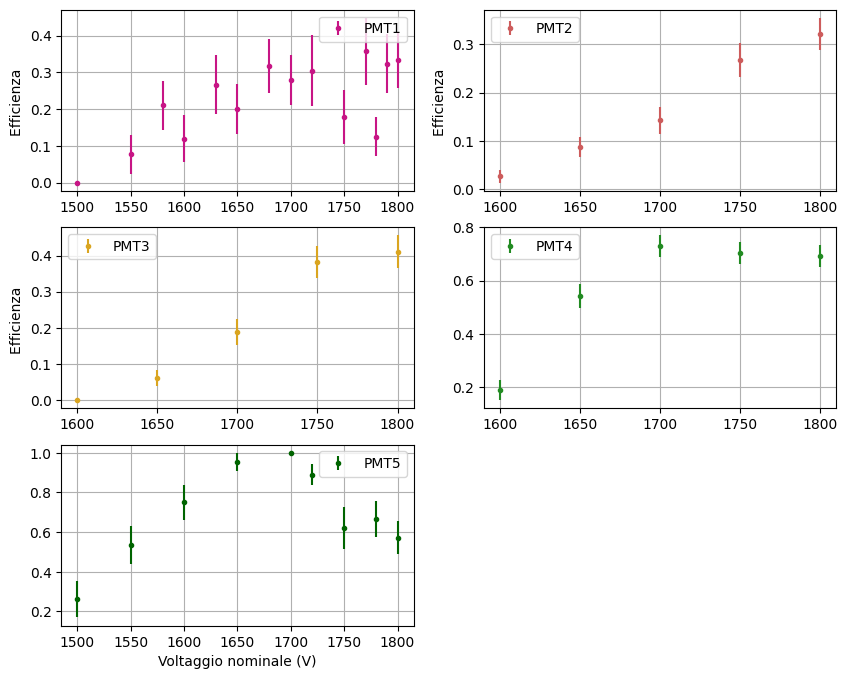

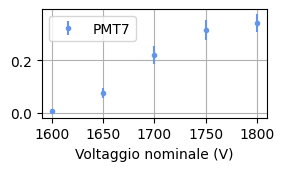

In [ ]:
plt.figure(figsize=(10,8))
plt.tight_layout
#plt.title('Efficienza fotomoltiplicatori degli scintillatori plastici')

plt.subplot(3,2,1)
plt.errorbar(V1,eff_1,error_eff1, fmt='.', color='mediumvioletred', label='PMT1')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(3,2,2)
plt.errorbar(V,eff_2,error_eff2, fmt='.', color='indianred', label='PMT2')
plt.grid(True)
plt.legend()

plt.subplot(3,2,3)
plt.errorbar(V,eff_3,error_eff3, fmt='.', color='goldenrod', label='PMT3')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()

plt.subplot(3,2,4)
plt.errorbar(V,eff_4,error_eff4, fmt='.', color='forestgreen', label='PMT4')
plt.grid(True)
plt.legend()

plt.subplot(3,2,5)
plt.errorbar(V2,eff_5,error_eff5, fmt='.', color='darkgreen',label='PMT5')
plt.xlabel('Voltaggio nominale (V)')
plt.ylabel('Efficienza ')
plt.grid(True)
plt.legend()
plt.show()

plt.subplot(3,2,6)
plt.errorbar(V,eff_7,error_eff7, fmt='.', color='cornflowerblue',label='PMT7')
plt.xlabel('Voltaggio nominale (V)')
plt.grid(True)
plt.legend()
plt.show()